<a href="https://colab.research.google.com/github/yeji924/hongik_foresight/blob/master/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ===========================
# import library
# ===========================
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator #추가적으로 import 해줌

#===========================
# import MNIST_dataset
#===========================
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

#===========================
# reshape input data
#===========================
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

#===========================
# train labels
#===========================
train_labels = to_categorical(train_labels) #one-hot encoding
test_labels = to_categorical(test_labels)   #one-hot encoding

#===========================
# model creation by sequential class
#===========================
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3,),activation='relu', input_shape=(28,28,1),padding='same'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3,),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3,),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
print(model.summary())

#===========================
#Tensorboard usage
#===========================
tensorboard = keras.callbacks.TensorBoard(log_dir="E:\\tensorflow\log")

#===========================
# data augment(추가한 code)
#===========================
generator = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=False,
    vertical_flip=True,
    zoom_range=[0.7,2.0])
train_data_aug=generator.flow(train_images,train_labels)
test_data_aug=generator.flow(test_images,test_labels)

#===========================
# model compile and training
#===========================
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_data_aug,steps_per_epoch=1000,epochs=20,validation_data=test_data_aug,validation_steps=100)

#===========================
# evaluating
#===========================
loss, acc = model.evaluate_generator(test_data_aug)
print('acc : ', acc); print('loss : ', loss);

#===========================
# model_save
#===========================
model.save('model.h5')


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_______________________________________________________

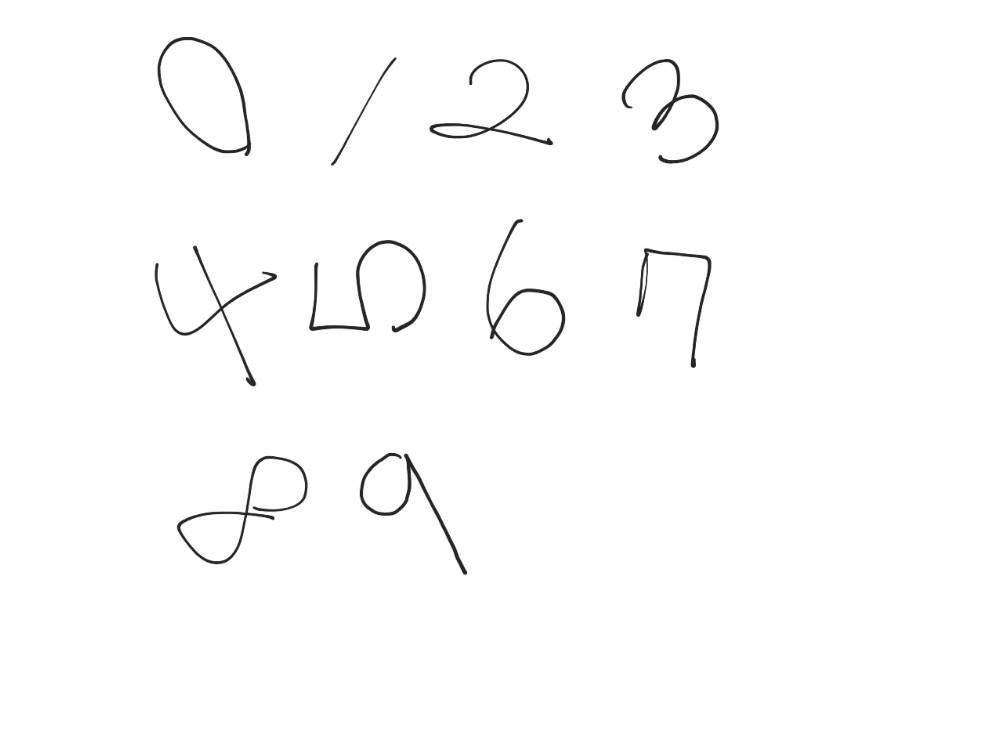

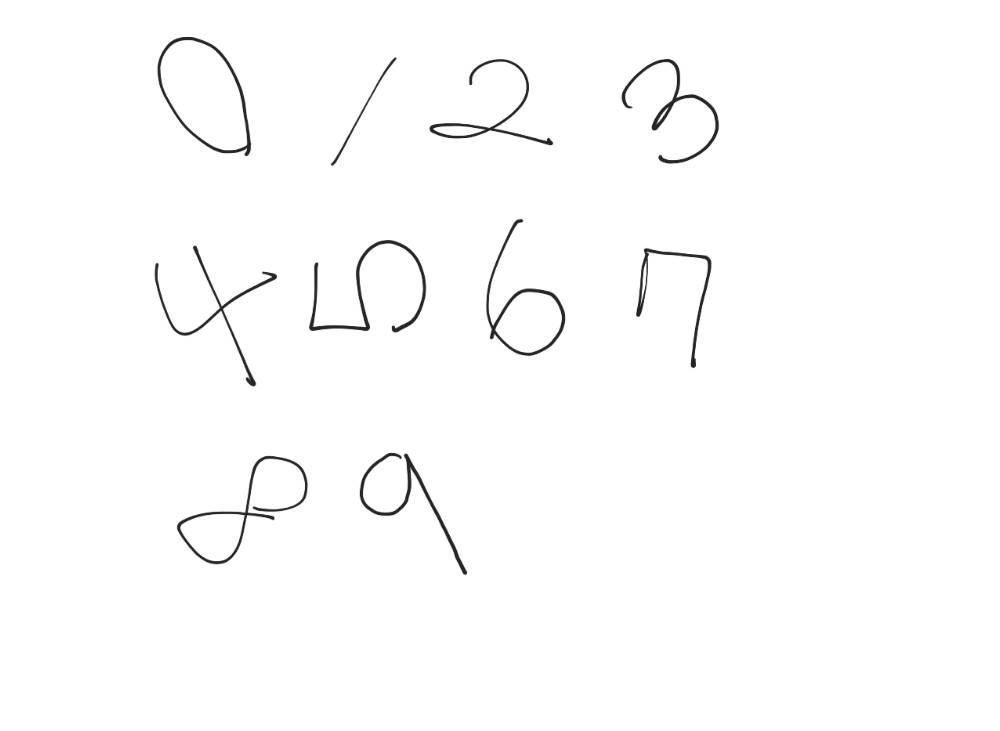

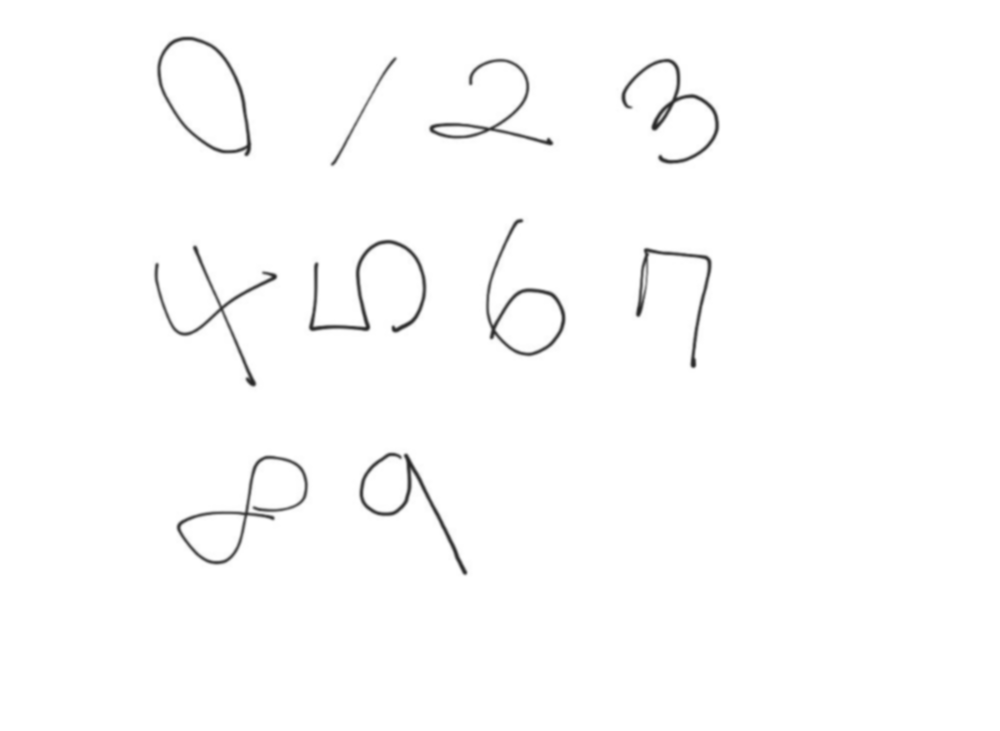

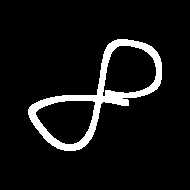

8


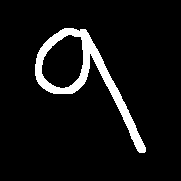

2


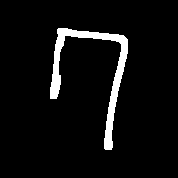

2


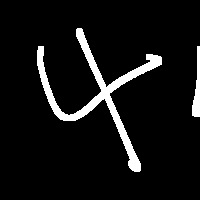

4


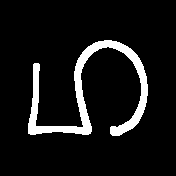

0


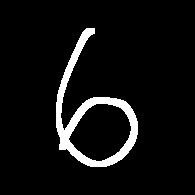

6


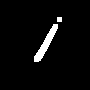

1


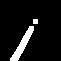

1


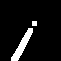

1


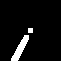

9


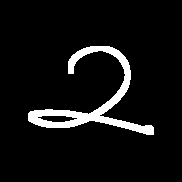

2


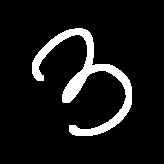

3


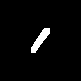

1


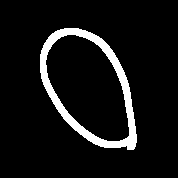

0


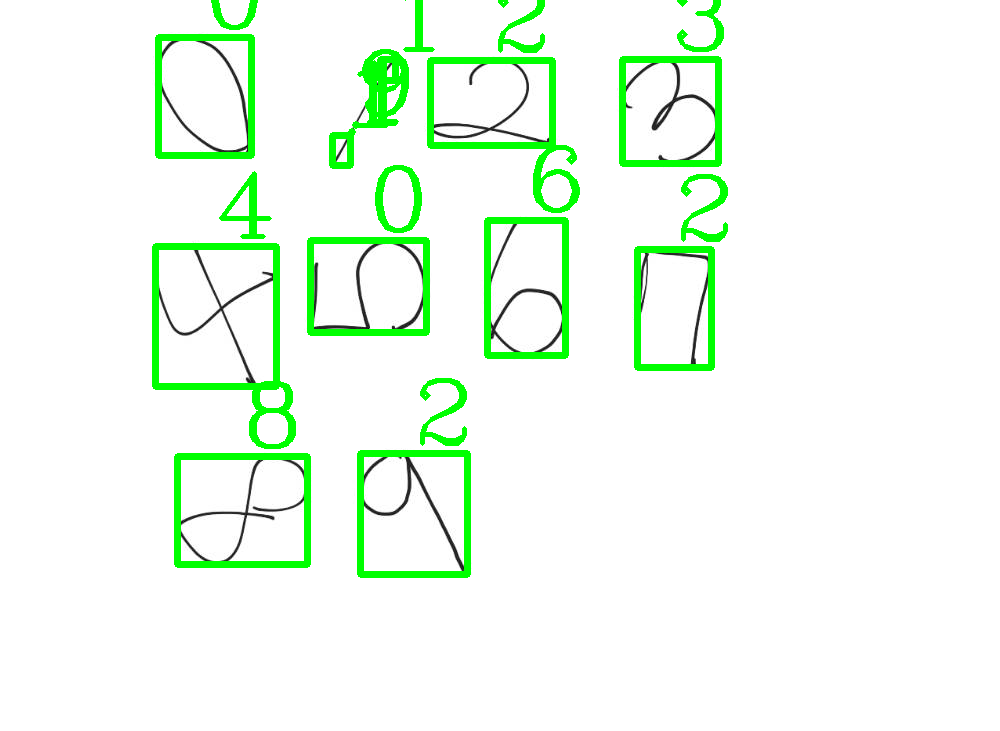

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

model = load_model('model.h5')

img_color = cv2.imread("/content/yezi_handwriting4.png", cv2.IMREAD_COLOR)

cv2_imshow(img_color)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

cv2_imshow(img_blur)

ret, img_th = cv2.threshold(img_blur, 125, 255, cv2.THRESH_BINARY_INV)

contours, hierachy = cv2.findContours(img_th.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
#

rects = [cv2.boundingRect(each) for each in contours]

for rect in rects:
    length = max(rect[2], rect[3]) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = rect[0]-(length - rect[2])//2, rect[1]-(length - rect[3])//2


    img_digit = img_th[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv2.morphologyEx(img_digit, cv2.MORPH_DILATE, kernel) #

    cv2_imshow(img_digit)
    img_digit = cv2.resize(img_digit, (28, 28), interpolation=cv2.INTER_AREA)  #

    img_digit = img_digit / 255.0 
    #크기를 1에 가깝게 만들어주기 위해 255로 나눈다.

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)   ##


    number = np.argmax(predictions)
    print(number)

    # Draw the rectangles
    cv2.rectangle(img_color, (rect[0], rect[1]),(rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5)

    location = (rect[0] + int(rect[2] *0.5), rect[1] - 10)
    font = cv2.FONT_HERSHEY_COMPLEX  
    fontScale = 3
    cv2.putText(img_color, str(number), location, font, fontScale, (0,255,0), 3)

cv2_imshow(img_color)
